**1D Non-linear Convection Equation**

In [1]:
from __future__ import division
from casadi import *
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
#from scipy.sparse import diags
from scipy.sparse import csc_matrix

In [2]:
L = 2
nx = 5

In [37]:
#print numpy.concatenate([numpy.linspace(0,nx-2,nx-1),numpy.linspace(1,nx-2,nx-2),numpy.linspace(0,nx-3,nx-2)])
#print numpy.concatenate([numpy.linspace(0,nx-2,nx-1),numpy.linspace(0,nx-3,nx-2),numpy.linspace(1,nx-2,nx-2)])

In [38]:
#A = MX.sym('A',Sparsity.banded(nx-1,1)) #tri-diagonal matrix
Amatrix_data = numpy.hstack((-2*numpy.ones(nx-1),numpy.ones(nx-2),numpy.ones(nx-2)))
Amatrix_rows = numpy.concatenate([numpy.linspace(0,nx-2,nx-1),numpy.linspace(1,nx-2,nx-2),numpy.linspace(0,nx-3,nx-2)])
Amatrix_cols = numpy.concatenate([numpy.linspace(0,nx-2,nx-1),numpy.linspace(0,nx-3,nx-2),numpy.linspace(1,nx-2,nx-2)])
A = MX(csc_matrix((Amatrix_data, (Amatrix_rows, Amatrix_cols)), shape=(nx-1, nx-1)))
b = numpy.zeros(nx-1)
b[0] = 1 #Left BC
b[-1] = 1 # Right BC

In [39]:
x = numpy.linspace(0,L,nx+1)

In [40]:
nu = MX.sym('nu')

In [41]:
u = MX.sym('u',nx-1) 

In [42]:
dx = MX.sym('dx')

In [43]:
ode = (nu/(dx**2.0))*(mtimes(A,u) + b)

In [44]:
dae = {'x':u,'p':vertcat(nu,dx),'ode':ode}

In [45]:
dx_numerical = L/nx
nu_numerical = 0.3
dt_limit = 0.5*dx_numerical**2/nu_numerical

In [46]:
dt = 0.4*dt_limit  # choose a safety factor for CFL condition
nt = 50
tend = dt*nt
ts = numpy.linspace(0,tend,tend/dt)

In [47]:
opts = {}
opts["fsens_err_con"] = True
opts["quad_err_con"] = True
opts["abstol"] = 1e-6
opts["reltol"] = 1e-6
opts["t0"] = 0
opts["tf"] = tend
opts["grid"] = ts
opts["output_t0"] = True

In [48]:
F = integrator("F","cvodes",dae,opts)

In [49]:
u0 = numpy.ones(nx-1) 
u0[numpy.intersect1d(numpy.where(x >= 0.5), numpy.where(x <= 1))] = 2 #Initial condition

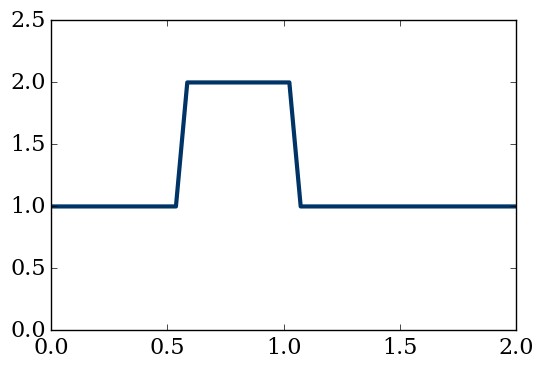

In [61]:
pyplot.plot(x, numpy.insert(u0,[0,-1],[b[0],b[-1]]), color='#003366', ls='-', lw=3)
pyplot.ylim(0,2.5);

In [51]:
sol = F(x0 = u0, p = (nu_numerical,dx_numerical))

In [52]:
sol = sol['xf'].full().T

In [53]:
u = numpy.insert(sol,[0,nx-1],[b[0],b[-1]],axis=1)

In [54]:
ufinal = numpy.insert(sol[nt-1,:],[0,-1],[b[0],b[-1]])
#numpy.insert(u0,[0,-1],[b[0],b[-1]])

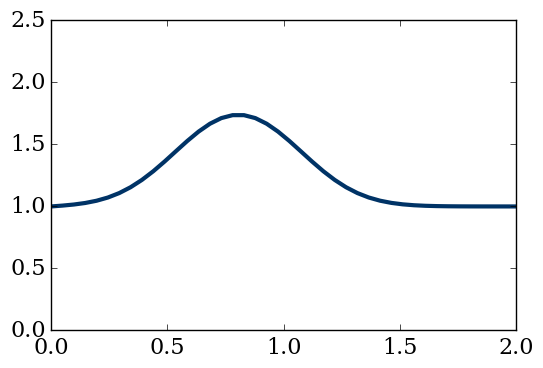

In [62]:
pyplot.plot(x, u[nt-1,:], color='#003366', ls='-', lw=3)
pyplot.ylim(0,2.5);